# WORK IN PROGRESS

- THIS DATA AND THIS MODEL ARE STILL BEING TRANSFORMED AND ASSESSED

In [1]:
# Import findspark and initialize. 
import findspark
findspark.init()

In [2]:
#import dependecies
import pandas as pd
import numpy as np
import seaborn as sns

import pyspark
from pyspark.sql import SparkSession
from pyspark import SparkFiles
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [3]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [4]:
#read in training dataset
df = pd.read_csv("Resources/cpl_train_cleaned.csv")

In [5]:
df.head()

,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,NaN,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High spent Small value payments,312.494089,Good
1,-500,NaN,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low spent Medium value payments,331.209863,Good
2,23,NaN,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low spent Small value payments,223.451310,Good
3,23,NaN,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High spent Medium value payments,341.489231,Good
4,23,NaN,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,!@9#%8,340.479212,Good


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93465 entries, 0 to 93464
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       93465 non-null  int64  
 1   SSN                       0 non-null      float64
 2   Occupation                93465 non-null  object 
 3   Annual_Income             93465 non-null  float64
 4   Monthly_Inhand_Salary     79447 non-null  float64
 5   Num_Bank_Accounts         93465 non-null  int64  
 6   Num_Credit_Card           93465 non-null  int64  
 7   Interest_Rate             93465 non-null  int64  
 8   Num_of_Loan               93465 non-null  int64  
 9   Type_of_Loan              82959 non-null  object 
 10  Delay_from_due_date       93465 non-null  int64  
 11  Num_of_Delayed_Payment    86910 non-null  float64
 12  Changed_Credit_Limit      91479 non-null  float64
 13  Num_Credit_Inquiries      91642 non-null  float64
 14  Credit

### Some More Cleaning

In [7]:
#investigate nan value of credit history age
df['Credit_History_Age'].unique()

array(['22 Years and 1 Months', '22 Years and 3 Months',
       '22 Years and 4 Months', '22 Years and 5 Months',
       '22 Years and 6 Months', '22 Years and 7 Months', nan,
       '26 Years and 7 Months', '26 Years and 8 Months',
       '26 Years and 10 Months', '26 Years and 11 Months',
       '27 Years and 0 Months', '27 Years and 1 Months',
       '27 Years and 2 Months', '17 Years and 9 Months',
       '17 Years and 10 Months', '17 Years and 11 Months',
       '18 Years and 1 Months', '18 Years and 2 Months',
       '18 Years and 3 Months', '18 Years and 4 Months',
       '17 Years and 3 Months', '17 Years and 4 Months',
       '17 Years and 5 Months', '30 Years and 8 Months',
       '30 Years and 9 Months', '30 Years and 11 Months',
       '31 Years and 0 Months', '31 Years and 1 Months',
       '31 Years and 2 Months', '32 Years and 0 Months',
       '32 Years and 2 Months', '32 Years and 3 Months',
       '32 Years and 5 Months', '32 Years and 6 Months',
       '30 Years and 

In [8]:
#Drop rows with nan value in Credit_Mix
df['Credit_History_Age'] = df['Credit_History_Age'].astype(str)
df = df[df['Credit_History_Age'] != 'nan']

In [10]:
#Investigate empty value in Credit_Mix
df['Credit_Mix'].unique()

array([' ', 'Good', 'Standard', 'Bad'], dtype=object)

In [11]:
#Drop rows with empty value in Credit_Mix
df = df[df['Credit_Mix'] != ' ']

In [12]:
# investigate !@9#%8 value in Payment Behavior
df['Payment_Behaviour'].unique()

array(['Low spent Medium value payments',
       'Low spent Small value payments',
       'High spent Medium value payments', '!@9#%8',
       'High spent Large value payments',
       'High spent Small value payments',
       'Low spent Large value payments'], dtype=object)

In [13]:
#Drop rows with !@9#%8 value in Credit_Mix
df = df[df['Payment_Behaviour'] != '!@9#%8']

### Addressing the numerical columns with null values

- I will go through each numerical column and assess the best imputation method on a case by case basis

In [14]:
#check values of age at brief look at the csv, there appears to be unrealistic ages like negative values
df['Age'].unique()

array([-500,   23,   28, ..., 8425, 4808, 2263], dtype=int64)

In [15]:
#Lets drop any ages less than 0 and greater than 100
df = df[(df['Age'] >= 0) & (df['Age'] <= 100)]

<Axes: ylabel='Frequency'>

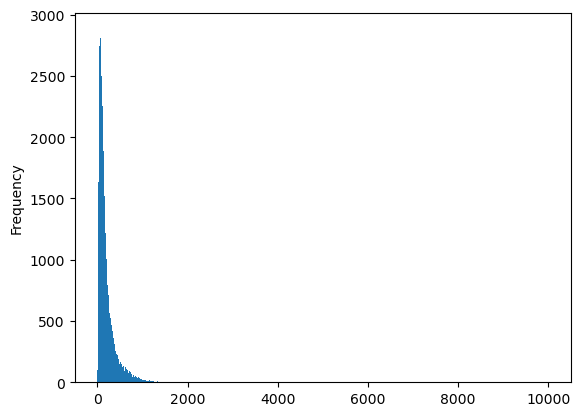

In [16]:
#histogram of feature with null values: Amount_invested_monthly
df['Amount_invested_monthly'].plot(kind='hist', bins = 1000)

In [17]:
# replace null values for the 'Amount_invested_monthly' with median value due to skewed data and outliers
median = df['Amount_invested_monthly'].median()
df['Amount_invested_monthly'].fillna(median, inplace = True)

<Axes: ylabel='Frequency'>

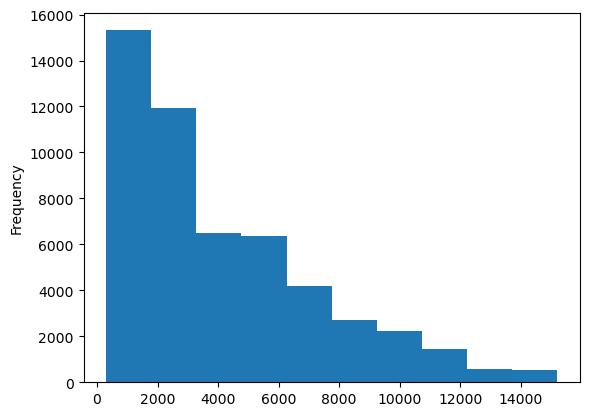

In [18]:
#histogram of feature with null values: Monthly_Inhand_Salary
df['Monthly_Inhand_Salary'].plot(kind='hist')

In [19]:
# replace null values for the 'Monthly_Inhand_Salary' with median value
median = df['Monthly_Inhand_Salary'].median()
df['Monthly_Inhand_Salary'].fillna(median, inplace = True)

4397.0


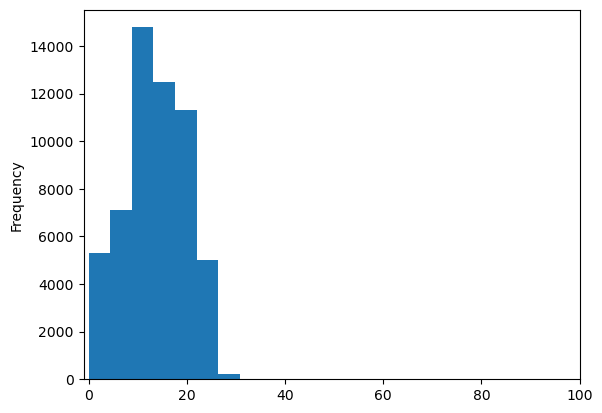

In [20]:
# histogram of feature with null values: Num_of_Delayed_Payment

# initial attempts to plot this histogram showed that it was skewed by a large outlier around at value 'max'
max = df['Num_of_Delayed_Payment'].max()

#set the limits of the graph to not display the outlier
df['Num_of_Delayed_Payment'].plot(kind ='hist', bins = 1000).set_xlim(-1, 100)
print(max)

In [21]:
# due to extremely high outlier in dataset, I will fill na values with the median
median = df['Num_of_Delayed_Payment'].median()
df['Num_of_Delayed_Payment'].fillna(median, inplace = True)

<Axes: ylabel='Frequency'>

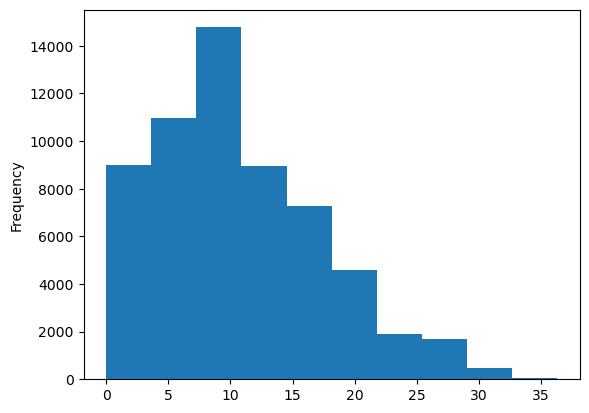

In [22]:
# histogram of feature with null values: Changed_Credit_Limit
df['Changed_Credit_Limit'].plot(kind = 'hist')

In [23]:
# replace null values with median due to skewed histogram
median = df['Changed_Credit_Limit'].median()
df['Changed_Credit_Limit'].fillna(median, inplace = True)

2594.0


(-1.0, 20.0)

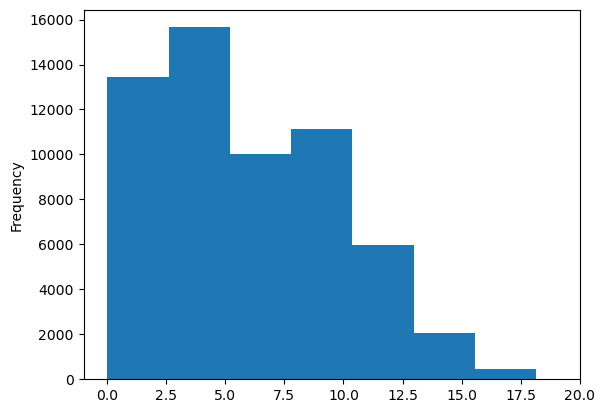

In [24]:
#  plot histogram of feature with null values: Num_Credit_Inquiries

# initial attempts to plot this histogram showed that it was skewed by a large outlier around at value 'max'
max = df['Num_Credit_Inquiries'].max()
print(max)

# set limits of x axis to exclude outlier
df['Num_Credit_Inquiries'].plot(kind = 'hist', bins = 1000).set_xlim(-1, 20)

In [25]:
#data is skewed with outliers so I will replace the na values with the median
median = df['Num_Credit_Inquiries'].median()
df['Num_Credit_Inquiries'].fillna(median, inplace = True)

<Axes: ylabel='Frequency'>

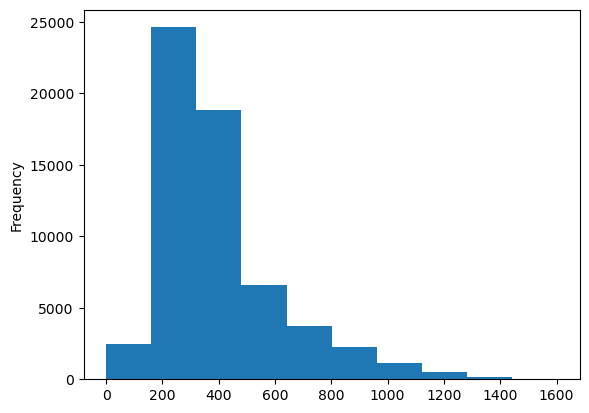

In [26]:
#  plot histogram of feature with null values: Monthly_Balance
df['Monthly_Balance'].plot(kind = 'hist')

In [27]:
#Data is skewed so i will fill na values with the median
median = df['Monthly_Balance'].median()
df['Monthly_Balance'].fillna(median, inplace = True)

### Addressing Categorical Columns
 - I will create dummy variables for categorical data and ordinal encode ordinal categorical data. This will be concacted to df after numerical data scaling.

In [28]:
#drop na values of Type_of_Loan
df['Type_of_Loan'].dropna(axis = 0, inplace = True)

In [29]:
# frequency encoding of categorical variables
type_of_loan_freq = df['Type_of_Loan'].value_counts()
payment_of_min_amount_freq = df['Payment_of_Min_Amount'].value_counts()
payment_behaviour_freq = df['Payment_Behaviour'].value_counts()
occupation_freq = df['Occupation'].value_counts()

In [30]:
#convert Credit_Mix to ordinal numerical column
target_list = ['Bad', 'Standard', 'Good']

df['Credit_Mix'] = pd.Categorical(df['Credit_Mix'], categories= target_list, ordered=True).codes

In [31]:
# convert Credit_History_Age from a string to a count of the months
def convert_to_months(duration_str):
    parts = duration_str.split(' ')
    years = int(parts[0])
    months = int(parts[3])
    total_months = years * 12 + months
    return total_months

df['Credit_History_Age'] = df['Credit_History_Age'].astype(dtype='str').apply(convert_to_months)

In [32]:
#drop SSN column and categorical features that were converted to dummies
df.drop(['SSN', 'Type_of_Loan', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Occupation'], axis = 1, inplace = True)

In [61]:
df['Credit_Score'].value_counts()

Credit_Score
Standard    32631
Poor        17883
Good        10435
Name: count, dtype: int64

In [33]:
#check dataframe
df.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
2,23,19114.12,3088.874167,3,4,3,4,5,4.0,6.27,4.0,2,809.98,31.377862,268,49.574949,199.458074,223.451310,Good
3,23,19114.12,1824.843333,3,4,3,4,6,14.0,11.27,4.0,2,809.98,24.797347,269,49.574949,41.420153,341.489231,Good
5,23,19114.12,1824.843333,3,4,3,4,3,8.0,11.27,4.0,2,809.98,22.537593,271,49.574949,178.344067,244.565317,Good
7,28,34847.84,3037.986667,2,4,6,1,3,4.0,5.42,2.0,2,605.03,24.464031,319,18.816215,104.291825,470.690627,Standard
8,28,34847.84,3037.986667,2,4,6,1,7,1.0,7.42,2.0,2,605.03,38.550848,320,18.816215,40.391238,484.591214,Good


### Transforming the target variable/ splitting dataframe/ scaling data
- I will encode the ordinal below target variable and split the data into training and testing groups. Then I will scale the features.

In [34]:
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [35]:
#create ordered list from target column 'Credit_Score'
target_list = ['Poor', 'Standard', 'Good']

In [59]:
#split data into target and features

#This transforms the Credit_Score column into a 0 for poor, 1 for standard, and 2 for good
y = pd.Categorical(df['Credit_Score'], categories= target_list, ordered=True).codes

#create feature only df
X = df.drop(['Credit_Score'], axis = 1)

y

array([2, 2, 2, ..., 1, 0, 1], dtype=int8)

In [36]:
# Concat dummy variable columns with feature df
#X = pd.concat([X,type_of_loan_dummies, payment_of_min_amount_dummies, payment_behaviour_dummies, occupation_dummies], axis = 1)

In [37]:
#split dateset in train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [38]:
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [56]:
# Convert the dataset into DMatrix format, which is a requirement for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

### Building the XGBOOST
- Below I will fit, predict, score my inital model

In [64]:
# Initialize the XGBClassifier
xgb_clf = XGBClassifier(objective='multi:softprob', num_class=3, missing=median, seed=42)

# Train the model with early stopping
xgb_clf.fit(
    X_train,
    y_train,
    verbose=True,
    early_stopping_rounds=10,
    eval_metric='aucpr',
    eval_set=[(X_test, y_test)]
)


[0]	validation_0-aucpr:0.69867
[1]	validation_0-aucpr:0.70490
[2]	validation_0-aucpr:0.70869
[3]	validation_0-aucpr:0.71205
[4]	validation_0-aucpr:0.71492
[5]	validation_0-aucpr:0.71588
[6]	validation_0-aucpr:0.71767
[7]	validation_0-aucpr:0.71833
[8]	validation_0-aucpr:0.71973
[9]	validation_0-aucpr:0.72140
[10]	validation_0-aucpr:0.72187
[11]	validation_0-aucpr:0.72226
[12]	validation_0-aucpr:0.72272
[13]	validation_0-aucpr:0.72260
[14]	validation_0-aucpr:0.72337
[15]	validation_0-aucpr:0.72425
[16]	validation_0-aucpr:0.72405
[17]	validation_0-aucpr:0.72419
[18]	validation_0-aucpr:0.72494
[19]	validation_0-aucpr:0.72574
[20]	validation_0-aucpr:0.72630
[21]	validation_0-aucpr:0.72729
[22]	validation_0-aucpr:0.72816
[23]	validation_0-aucpr:0.72864
[24]	validation_0-aucpr:0.72859
[25]	validation_0-aucpr:0.72923
[26]	validation_0-aucpr:0.72941
[27]	validation_0-aucpr:0.73000
[28]	validation_0-aucpr:0.73097
[29]	validation_0-aucpr:0.73129
[30]	validation_0-aucpr:0.73160
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=335.239401779418,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [51]:
prediction = xgb_clf.predict(X_test_scaled)

In [52]:
#get confusion matrix
confusion_matrix(y_test, prediction)

array([[   0, 4471,    0],
       [   0, 8158,    0],
       [   0, 2609,    0]], dtype=int64)

In [49]:
#print classification report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4471
           1       0.54      1.00      0.70      8158
           2       0.00      0.00      0.00      2609

    accuracy                           0.54     15238
   macro avg       0.18      0.33      0.23     15238
weighted avg       0.29      0.54      0.37     15238



c:\Users\monik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\monik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\monik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


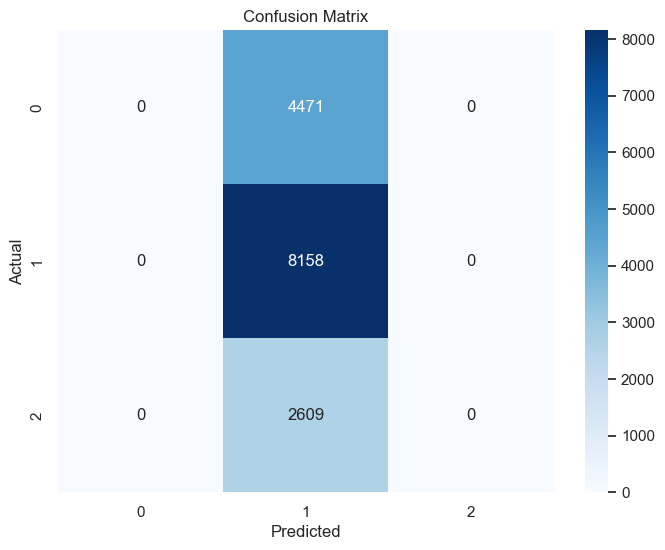

In [45]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, prediction)

# Plot the confusion matrix with Seaborn
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')  # Adjusting Seaborn style
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Initial Assessment and Fixes
- Accuracy is below goal of ~54%
- Creating training data with an equal amount of observations for each target may improve results.